# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from pylab import rcParams
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import Imputer
import copy
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from matplotlib import pyplot
from numpy import mean
import statsmodels.api as sm
import statsmodels.api as sm

# Importing the pre-processed dataset

In [2]:
forecast_data = pd.read_csv('differenced approach 1_v2.csv', parse_dates=['Date'], index_col='Date')
forecast_data.describe()

,Arrivals to Italy,Arrivals to Greek Islands,Departures to mainland Greece,Arrivals to fYRoM,Arrivals to Serbia,Arrivals to Croatia,Arrivals to Hungary,Arrivals to Slovenia,Arrivals to Austria
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,-2.395415,-4.521490,-8.340974,-9.435530,3.581662,-9.896848,-2.587393,-0.017192,0.954155
std,1129.356150,1341.899532,1885.947674,1458.011106,1241.694815,1242.539067,518.017015,1385.089380,1218.378088
min,-3678.000000,-5951.000000,-6037.000000,-7803.000000,-6502.000000,-5706.000000,-6175.000000,-6170.000000,-6823.000000
25%,-467.000000,-165.000000,-164.000000,0.000000,-64.000000,0.000000,-22.000000,0.000000,-99.000000
50%,0.000000,-3.000000,-6.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
75%,494.000000,216.000000,72.000000,0.000000,63.000000,0.000000,26.000000,0.000000,108.000000
max,4753.000000,5433.000000,8430.000000,5959.000000,5403.000000,4636.000000,5489.000000,6812.000000,5374.000000


# Train and Test set partitioning

In [3]:
train_size = int(len(forecast_data) * 0.8) # Taking Training size as 80% of the total length
test_size = len(forecast_data) - train_size
train = forecast_data['Arrivals to Austria'][:train_size]
test = forecast_data['Arrivals to Austria'][train_size:]


# ARIMA Forecast 

In [4]:
def arima_forecast(country, p, d, q):
    predicted = list()
    train = country[:train_size]
    test = country[train_size:]
    train  = train.astype('float64')
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit(disp=-1)
    predicted = model_fit.forecast(steps=20)[0]
    return (predicted)

# AR Fit Model

                               ARMA Model Results                              
Dep. Variable:     Arrivals to Austria   No. Observations:                  279
Model:                      ARMA(1, 0)   Log Likelihood               -2401.105
Method:                        css-mle   S.D. of innovations           1322.219
Date:                 Tue, 17 Sep 2019   AIC                           4808.209
Time:                         09:13:50   BIC                           4819.103
Sample:                     10-09-2015   HQIC                          4812.579
                          - 07-13-2016                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.8633     63.952     -0.029      0.977    -127.206     123.479
ar.L1.Arrivals to Austria    -0.2387      0.059     -4.036      0.000      -0.

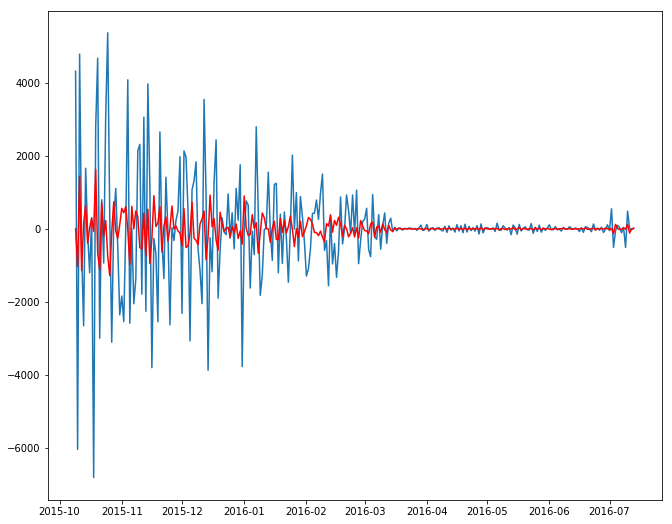

In [5]:
fore_data_aus = forecast_data['Arrivals to Austria'][:train_size]
fore_data_aus = fore_data_aus.astype('float64')
model = ARMA(fore_data_aus, order=(1, 0))  
results_AR = model.fit(disp=0)  
print(results_AR.summary())
print("μ={}, ϕ={}".format(results_AR.params[0],results_AR.params[1]))
rcParams['figure.figsize'] = 11, 9
plt.plot(fore_data_aus)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

# AR Forecasting Model

In [6]:
predicted_series = copy.deepcopy(forecast_data)
predictions = arima_forecast(forecast_data['Arrivals to Austria'], 1, 0, 0)
predictions = predictions.astype('int')
mse = mean_squared_error(test[:20], predictions)
print ('RMSE value: ',math.sqrt(mse))

RMSE value:  36.73349969714293


# ARMA Fit model - Combining AR and MA models



                               ARMA Model Results                              
Dep. Variable:     Arrivals to Austria   No. Observations:                  279
Model:                      ARMA(2, 3)   Log Likelihood               -2374.437
Method:                        css-mle   S.D. of innovations           1192.661
Date:                 Tue, 17 Sep 2019   AIC                           4762.874
Time:                         09:14:08   BIC                           4788.293
Sample:                     10-09-2015   HQIC                          4773.071
                          - 07-13-2016                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.7254      2.111      0.344      0.731      -3.413       4.864
ar.L1.Arrivals to Austria     0.2607      0.262      0.995      0.321      -0.

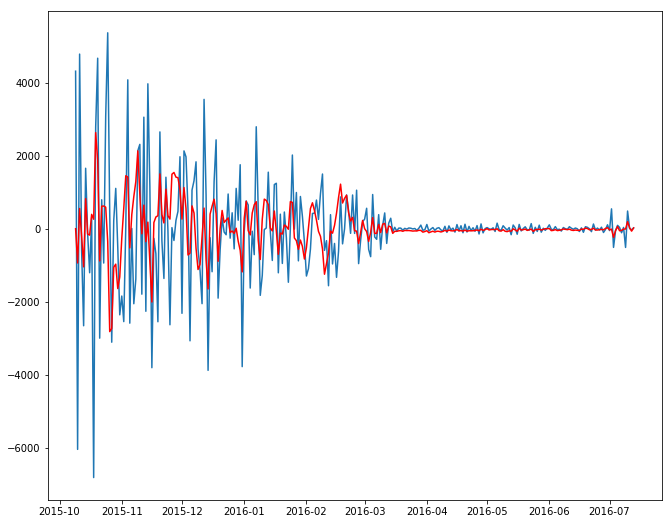

In [7]:
fit_data_aus = forecast_data['Arrivals to Austria'][:train_size]
fit_data_aus = fit_data_aus.astype('float64')
model_arma = ARMA(fit_data_aus, order=(2, 3))
result_arma = model_arma.fit()
print(result_arma.summary())
print("μ={}, ϕ={}, θ={}".format(result_arma.params[0],result_arma.params[1],result_arma.params[2]))
rcParams['figure.figsize'] = 11, 9
plt.plot(fit_data_aus)
plt.plot(result_arma.fittedvalues, color='red')
plt.show()


# ARMA Forecasting model

In [8]:
predicted_series_ARMA = copy.deepcopy(forecast_data)
predictions_ARMA = arima_forecast(forecast_data['Arrivals to Austria'], 2, 0, 3)
predictions_ARMA = predictions_ARMA.astype('int')
mse = mean_squared_error(test[:20], predictions_ARMA)
print ('RMSE value: ',math.sqrt(mse))

RMSE value:  36.17250336927208


# R - Squared error calculation - ARMA model

In [9]:
from sklearn.metrics import r2_score
r2_score(test[:20], predictions_ARMA)

0.041180964314960655

# ARIMA Fit model

                                  ARIMA Model Results                                  
Dep. Variable:     D.Arrivals to Greek Islands   No. Observations:                  278
Model:                          ARIMA(3, 1, 2)   Log Likelihood               -2417.303
Method:                                css-mle   S.D. of innovations           1428.735
Date:                         Tue, 17 Sep 2019   AIC                           4848.606
Time:                                 09:14:29   BIC                           4873.999
Sample:                             10-10-2015   HQIC                          4858.793
                                  - 07-13-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0954      0.737      0.129      0.897      -1.350   

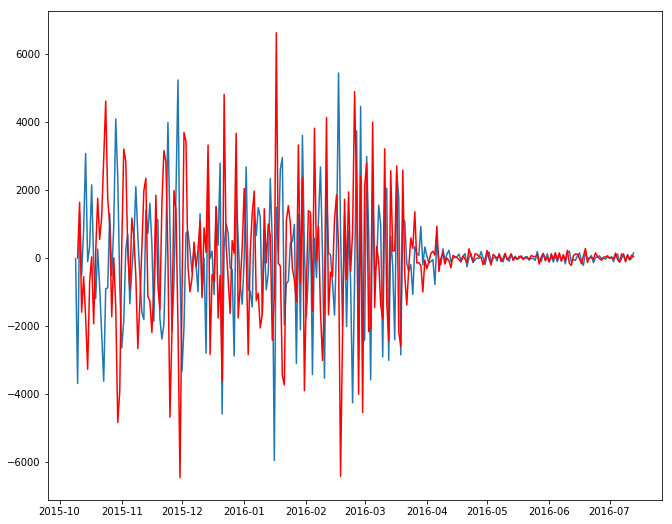

In [10]:
fit_data_arima = forecast_data['Arrivals to Greek Islands'][:train_size]
fit_data_arima = fit_data_arima.astype('float64')
model_arima = ARIMA(fit_data_arima, order=(3, 1, 2))
result_arima = model_arima.fit()
print(result_arima.summary())
print("μ={}, ϕ={}, θ={}".format(result_arima.params[0],result_arima.params[1],result_arima.params[2]))
rcParams['figure.figsize'] = 11, 9
plt.plot(fit_data_arima)
plt.plot(result_arima.fittedvalues, color='red')
plt.show()

# ARIMA Forecast model

In [11]:
predicted_series_ARIMA = copy.deepcopy(forecast_data)
predictions_ARIMA = arima_forecast(forecast_data['Arrivals to Greek Islands'], 4, 1, 2)
predictions_ARIMA = predictions_ARIMA.astype('int')
mse = mean_squared_error(test[:20], predictions_ARIMA)
print ('RMSE value: ',math.sqrt(mse))

RMSE value:  38.36600057342438


# Rolling Forecast Models - SARIMA, ARIMA.

# SARIMA Fit model

                               Statespace Model Results                              
Dep. Variable:     Arrivals to Greek Islands   No. Observations:                  279
Model:                      SARIMAX(5, 1, 0)   Log Likelihood               -2428.616
Date:                       Tue, 17 Sep 2019   AIC                           4869.232
Time:                               09:14:49   BIC                           4890.998
Sample:                           10-09-2015   HQIC                          4877.964
                                - 07-13-2016                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9763      0.046    -21.154      0.000      -1.067      -0.886
ar.L2         -1.0008      0.057    -17.564      0.000      -1.113      -0.

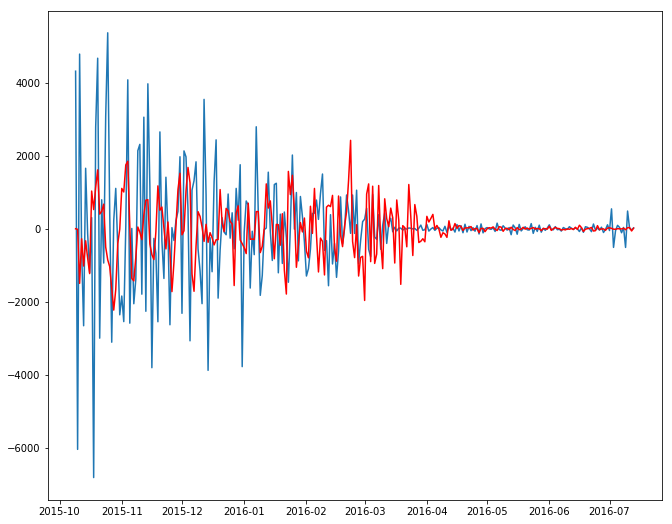

In [12]:
Model = sm.tsa.statespace.SARIMAX(forecast_data['Arrivals to Greek Islands'][:train_size], order=(5,1,0), seasonal_order=(0,0,0,1))
model_fit=Model.fit(disp=0)
print(model_fit.summary())
print("μ={}, ϕ={}, θ={}".format(model_fit.params[0],model_fit.params[1],model_fit.params[2]))
rcParams['figure.figsize'] = 11, 9
plt.plot(forecast_data['Arrivals to Austria'][:train_size])
plt.plot(model_fit.fittedvalues, color='red')
plt.show()

# Rolling forecast SARIMAX

In [13]:
def sarima_rolling_forecast(country, order, train_size = 285):

    train = country[:train_size]
    test = country[train_size:]
    history = [x for x in train]
    predictions_f_sarima = list()

    for t in range(len(test)):
        model = sm.tsa.statespace.SARIMAX(history, order=(5,1,0), seasonal_order=(1,0,0,1))
        model_fit = model.fit(disp=0)
        yhat_f = model_fit.forecast()[0]
        predictions_f_sarima.append(yhat_f)
        history.append(test[t])
    return predictions_f_sarima

data_roll_forecast_sarima = forecast_data['Arrivals to Austria']
data_roll_forecast_sarima = data_roll_forecast_sarima.astype('float64')
predictions_f_sarima = sarima_rolling_forecast(data_roll_forecast_sarima, (4,1,1))
mse = mean_squared_error(test[:20], predictions_f_sarima[:20])
print ('RMSE value: ',math.sqrt(mse))

RMSE value:  31.757375613753364


# Rolling forecast model for ARIMA

In [14]:
def arima_rolling_forecast(country, order, train_size = 285):

    train = country[:train_size]
    test = country[train_size:]
    history = [x for x in train]
    predictions_f = list()

    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        yhat_f = model_fit.forecast()[0]
        predictions_f.append(yhat_f)
        history.append(test[t])
    return predictions_f

data_roll_forecast = forecast_data['Arrivals to Austria']
data_roll_forecast = data_roll_forecast.astype('float64')
predictions_f = arima_rolling_forecast(data_roll_forecast, (4,1,1))
mse = mean_squared_error(test[:20], predictions_f[:20])
print ('RMSE value: ',math.sqrt(mse))




RMSE value:  46.87632182746844


The same procedure has to be followed for other forecasting models such as AR and ARMA models.

# Optimisation - Grid Search for ARIMA p, d, q Values

In [ ]:
def evaluate_arima(serie,order):
    serie=pd.Series(serie)
    predictions = arima_rolling_forecast(serie, order)
    mse = mean_squared_error(test[:20], predictions[:20])
    rmse = math.sqrt(mse)
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float64')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
#arima(humidity['Montreal'],(2,1,0))
p_values = range(1, 4)
d_values = range(0, 1)
q_values = range(1, 4)
warnings.filterwarnings("ignore")
evaluate_models(forecast_data['Arrivals to Austria'], p_values, d_values, q_values)

ARIMA(1, 0, 1) RMSE=42.454
ARIMA(1, 0, 2) RMSE=42.645
ARIMA(1, 0, 3) RMSE=74.675
ARIMA(2, 0, 2) RMSE=42.550
ARIMA(2, 0, 3) RMSE=43.854
ARIMA(3, 0, 1) RMSE=43.417
ARIMA(3, 0, 2) RMSE=44.602
